In [ ]:
from ultralytics import YOLO

DATA_YAML = r"C:\codeblender\ML\dataset\data.yaml"

model = YOLO("yolov8n.pt")

model.train(
    data=DATA_YAML,
    epochs=20,
    imgsz=640,
    batch=16,
    workers=6,
    device=0,
    name="yolo_final",
    cache="disk",
    augment=True,
)

In [5]:
from ultralytics import YOLO

best = r"C:\codeblender\ML\runs\detect\yolo_final\weights\best.pt" 
model = YOLO(best)
metrics = model.val()  # run eval
box = metrics.box if hasattr(metrics, "box") else metrics

map50 = getattr(box, "map50", 0)
map_all = getattr(box, "map", 0)
precision = getattr(box, "mp", 0)
recall = getattr(box, "mr", 0)
print(f"After training, the YOLOv8 model achieved mean_avg_precision(map) = {map50:.3f} and \nmap_all = {map_all:.3f} on the validation set and precision = {precision:.3f} , recall = {recall:.3f}")

Ultralytics 8.3.228  Python-3.11.9 torch-2.10.0.dev20251114+cu128 CUDA:0 (NVIDIA GeForce RTX 5050 Laptop GPU, 8151MiB)
Model summary (fused): 72 layers, 3,009,158 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.50.1 ms, read: 114.838.0 MB/s, size: 64.6 KB)
val: Scanning C:\codeblender\ML\dataset\valid\labels.cache... 441 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 441/441  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 28/28 6.9it/s 4.1s0.1s
                   all        441        468      0.732      0.744      0.777      0.584
                beagle         36         39      0.818      0.806      0.896      0.657
         border_collie         25         27      0.907       0.72      0.803      0.607
                 boxer         20         21       0.63      0.476      0.532      0.412
                  chow         33         33      0.947      0.939       0.98      0.785
        cocker

In [6]:
import os
DATA_DIR = r"C:\codeblender\ML\dataset"  # your dataset root
test_imgs = os.path.join(DATA_DIR, "test", "newimgs")
model.predict(source=test_imgs, save=True, imgsz=640)
print("Predictions saved to runs/detect/predict/")


image 1/18 C:\codeblender\ML\dataset\test\newimgs\Border_collie_141_jpg.rf.cf8ddfae033ef8b834e4d977ad0bba91.jpg: 640x640 1 border_collie, 7.5ms
image 2/18 C:\codeblender\ML\dataset\test\newimgs\Doberman_14_jpg.rf.586edfef75d6c7b7879a119a8d7928c5.jpg: 640x640 1 doberman, 8.2ms
image 3/18 C:\codeblender\ML\dataset\test\newimgs\German_shepherd_92_jpg.rf.8afbe8b00cc0f5ee7726dd983d840518.jpg: 640x640 1 german_shepherd, 9.0ms
image 4/18 C:\codeblender\ML\dataset\test\newimgs\Great_Dane_55_jpg.rf.3a5155494912a2ffd280ac4f927907ff.jpg: 640x640 1 doberman, 1 great_dane, 7.4ms
image 5/18 C:\codeblender\ML\dataset\test\newimgs\Labrador_retriever_140_jpg.rf.11fce3e0a6c7a4e8bee032c251bbbe70.jpg: 640x640 1 labrador_retriever, 5.8ms
image 6/18 C:\codeblender\ML\dataset\test\newimgs\Pomeranian_92_jpg.rf.a3082d97495b205894b48e3ff99ff92c.jpg: 640x640 1 pomeranian, 5.9ms
image 7/18 C:\codeblender\ML\dataset\test\newimgs\Rottweiler_129_jpg.rf.5e8c60e61bc8324400334000bb6441eb.jpg: 640x640 1 doberman, 5.9ms

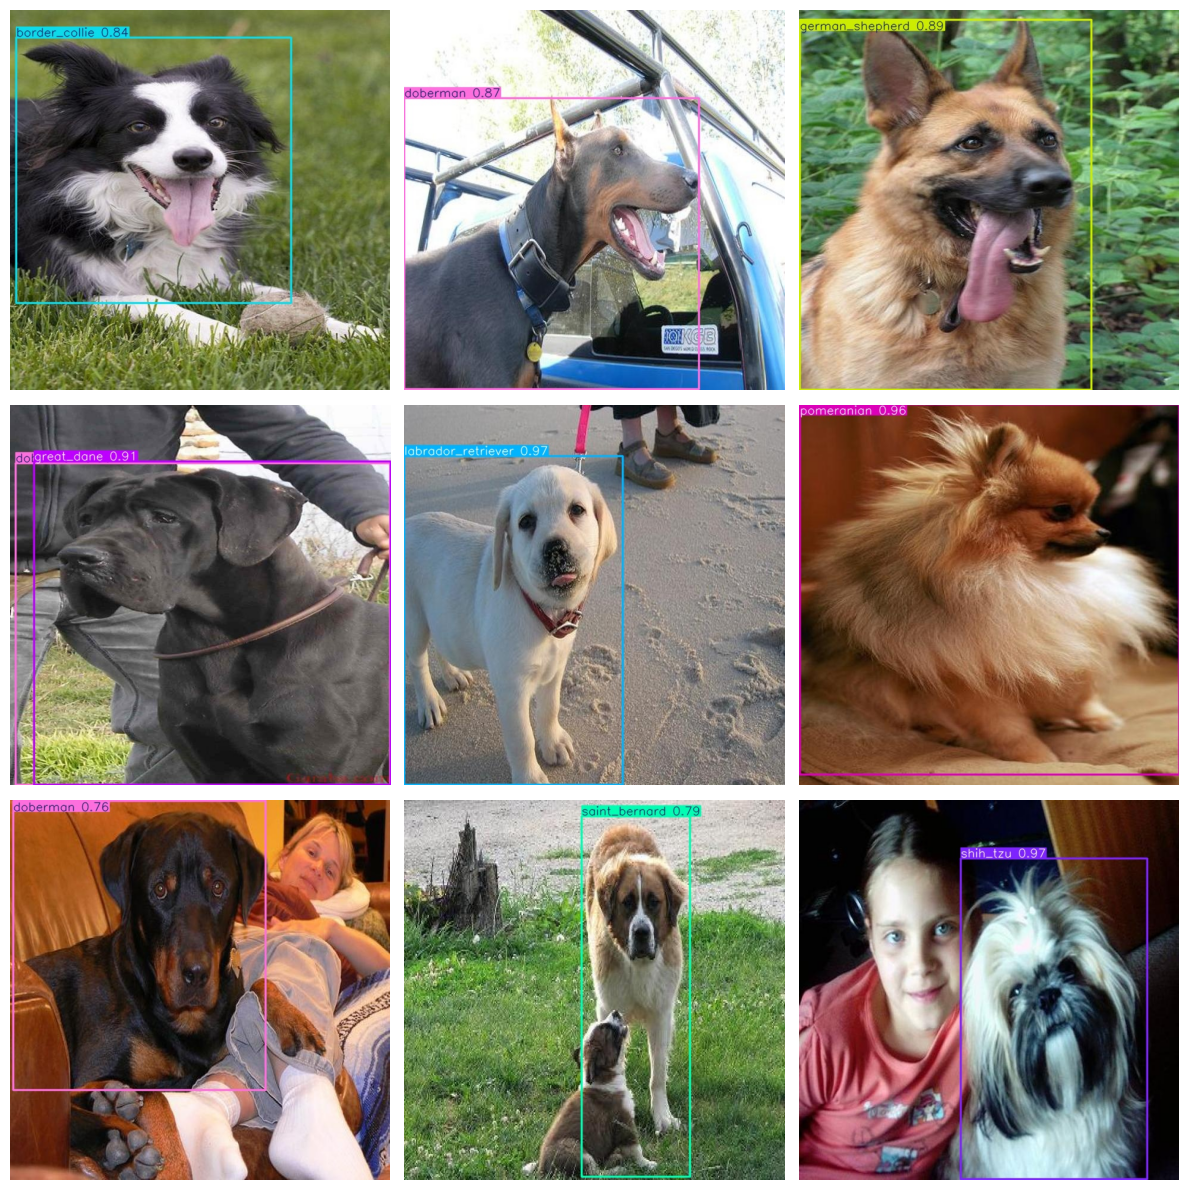

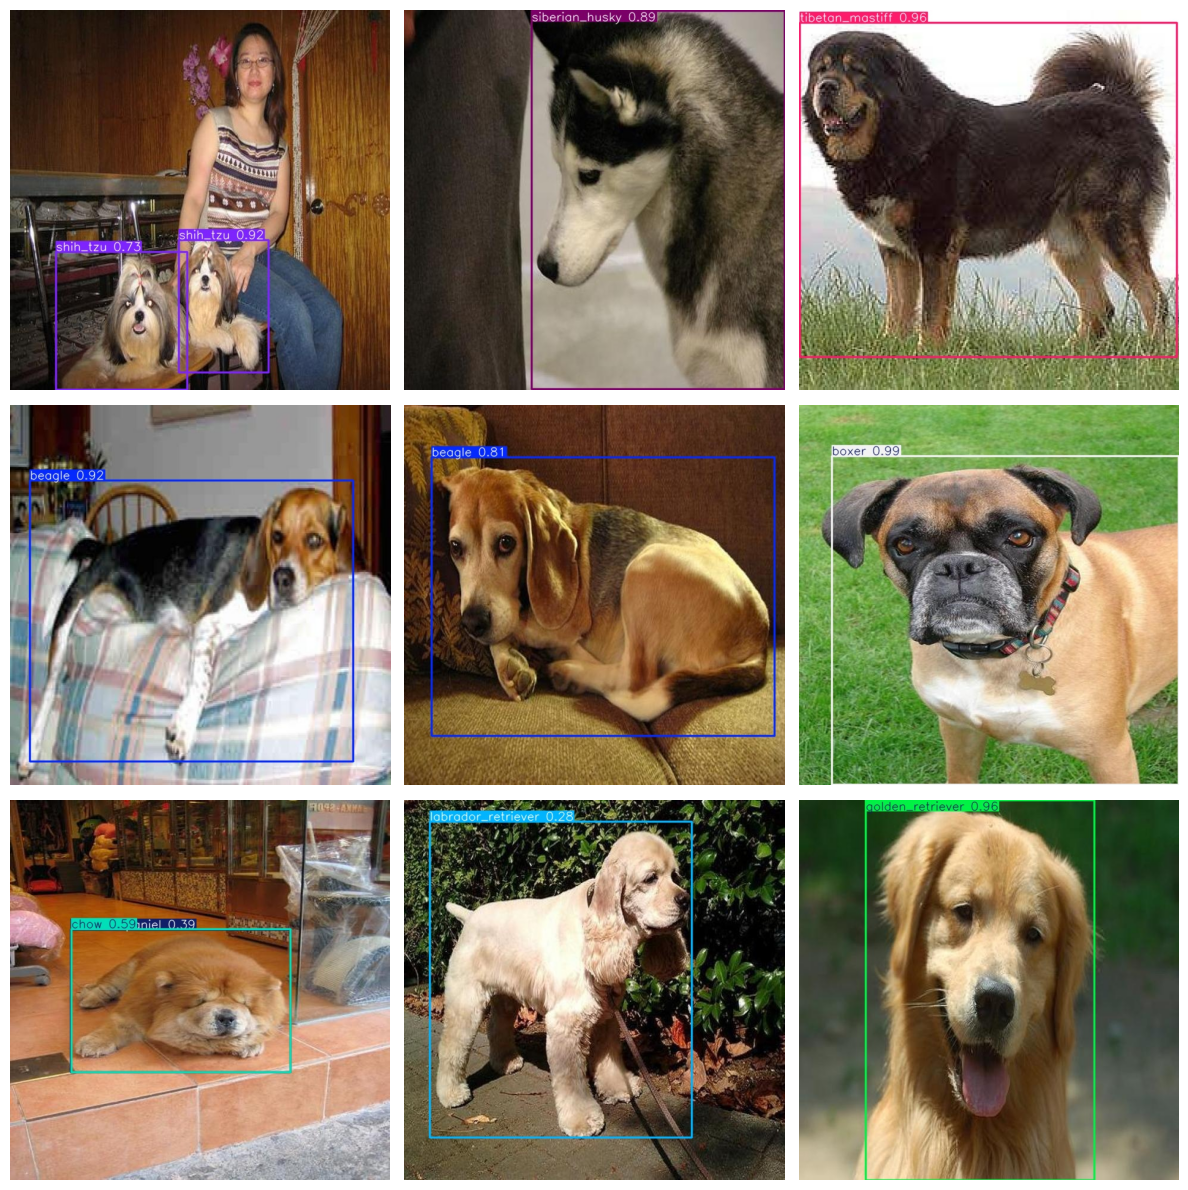

In [7]:
import matplotlib.pyplot as plt
import glob
from PIL import Image
%matplotlib inline


outs = sorted(glob.glob("runs/detect/predict/*.jpg"))
img_perbox = 9
for start in range(0, len(outs), img_perbox):
    batch = outs[start : start + img_perbox]

    plt.figure(figsize=(12, 12))
    for i, img_path in enumerate(batch):
        img = Image.open(img_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)

        plt.axis("off")
    plt.tight_layout()
    plt.show()